### Read and Load Data from MSSQL database into Python

### Method 1: Utilizing the Pypyodbc Library

####  Load Libraries

In [38]:
import pypyodbc as podbc
import pandas as pd

#### Create Connection

In [39]:
cr_connect= podbc.connect ("""
                   Driver={ODBC Driver 17 for SQL Server}; 
                   Server=DESKTOP-ULUKUD4;
                   Database=Practice;
                   Trusted_Connection=yes;
                   """
)

#### Execute Query to Fetch data

In [40]:
Query= pd.read_sql_query ("select* from sales_data",cr_connect)
Query.head()

<ipython-input-40-36099b21294f>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Query= pd.read_sql_query ("select* from sales_data",cr_connect)


,date,sales_rep,shift,expenses,revenue,profit,profit%,commission,weekday,payment_shift
0,2022-07-01,Ben,Night,1112.94,1288.00,175.06,15.73,6.44,Friday,50.0
1,2022-07-01,Jacob,Day,1095.50,1250.75,155.25,14.17,6.25,Friday,40.0
2,2022-07-04,Ben,Night,1120.94,1295.00,174.06,15.53,6.47,Monday,50.0
3,2022-07-04,Jacob,Day,1509.73,1687.75,178.02,11.79,0.00,Monday,40.0
4,2022-07-05,Ben,Day,1235.33,1412.25,176.92,14.32,7.06,Tuesday,40.0


In [41]:
Query.tail()

,date,sales_rep,shift,expenses,revenue,profit,profit%,commission,weekday,payment_shift
83,2022-08-29,Jacob,Day,774.20,946.25,172.05,22.22,14.19,Monday,40.0
84,2022-08-30,Ben,Day,1350.48,1509.50,159.02,11.78,0.00,Tuesday,40.0
85,2022-08-30,Jacob,Night,1053.37,1136.25,82.88,7.87,0.00,Tuesday,50.0
86,2022-08-31,Ben,Night,1161.92,1237.00,75.08,6.46,0.00,Wednesday,50.0
87,2022-08-31,Jacob,Day,951.93,1136.00,184.07,19.34,5.68,Wednesday,40.0


In [42]:
Query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           88 non-null     object 
 1   sales_rep      88 non-null     object 
 2   shift          88 non-null     object 
 3   expenses       88 non-null     float64
 4   revenue        88 non-null     float64
 5   profit         88 non-null     float64
 6   profit%        88 non-null     float64
 7   commission     88 non-null     float64
 8   weekday        88 non-null     object 
 9   payment_shift  88 non-null     float64
dtypes: float64(6), object(4)
memory usage: 7.0+ KB


In [43]:
Query.shape

(88, 10)

### Method 2: Utilizing the SQL Alchemy Library

#### Load Library

In [44]:
from sqlalchemy import create_engine
import pandas as pd

#### Create Connection

In [45]:
Server= 'DESKTOP-ULUKUD4'
Database= 'Practice'
Driver= 'ODBC Driver 17 for SQL Server'
Database_Connection= f'mssql://{Server}/{Database}?driver={Driver}'

In [46]:
engine= create_engine(Database_Connection)
connection= engine.connect()

#### Excecuting Query to Fetch data

In [47]:
df= pd.read_sql_query("Select * from sales_data",connection)

In [48]:
df.head()

,Date,Sales_Rep,Shift,Expenses,Revenue,Profit,Profit%,Commission,Weekday,Payment_Shift
0,2022-07-01,Ben,Night,1112.94,1288.00,175.06,15.73,6.44,Friday,50.0
1,2022-07-01,Jacob,Day,1095.50,1250.75,155.25,14.17,6.25,Friday,40.0
2,2022-07-04,Ben,Night,1120.94,1295.00,174.06,15.53,6.47,Monday,50.0
3,2022-07-04,Jacob,Day,1509.73,1687.75,178.02,11.79,0.00,Monday,40.0
4,2022-07-05,Ben,Day,1235.33,1412.25,176.92,14.32,7.06,Tuesday,40.0


In [49]:
df.tail()

,Date,Sales_Rep,Shift,Expenses,Revenue,Profit,Profit%,Commission,Weekday,Payment_Shift
83,2022-08-29,Jacob,Day,774.20,946.25,172.05,22.22,14.19,Monday,40.0
84,2022-08-30,Ben,Day,1350.48,1509.50,159.02,11.78,0.00,Tuesday,40.0
85,2022-08-30,Jacob,Night,1053.37,1136.25,82.88,7.87,0.00,Tuesday,50.0
86,2022-08-31,Ben,Night,1161.92,1237.00,75.08,6.46,0.00,Wednesday,50.0
87,2022-08-31,Jacob,Day,951.93,1136.00,184.07,19.34,5.68,Wednesday,40.0


In [50]:
df.shape

(88, 10)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           88 non-null     object 
 1   Sales_Rep      88 non-null     object 
 2   Shift          88 non-null     object 
 3   Expenses       88 non-null     float64
 4   Revenue        88 non-null     float64
 5   Profit         88 non-null     float64
 6   Profit%        88 non-null     float64
 7   Commission     88 non-null     float64
 8   Weekday        88 non-null     object 
 9   Payment_Shift  88 non-null     float64
dtypes: float64(6), object(4)
memory usage: 7.0+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

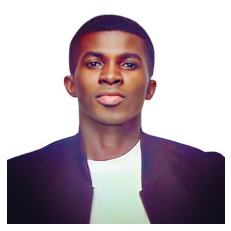

In [52]:
import matplotlib.pyplot as plt
img= plt.imread("C:/Users/DELL/Pictures/LOGO/HEADSHOT.jpg")
plt.imshow(img)
plt.axis('off')
plt.show


Done by: Jones Osele
Email: oselejones@gmail.com